In [2]:
!pip install yfinance pandas requests beautifulsoup4 plotly

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     -------------------- ----------------- 524.3/949.2 kB 1.0 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.6 MB 765.1 kB/s eta 0:00:02
   ------------------- -------------------- 

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
#Q1.
# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Get all historical stock data
tesla_data = tesla.history(period="max")

# Reset the index to make 'Date' a column and display the first 5 rows
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
#Q2.
# The URL containing the revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Download the webpage content
html_data = requests.get(url).text

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with Tesla's revenue (it's the second table on the page)
tesla_revenue_table = soup.find_all('table')[1]

# Create a new DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through the table rows to extract data
for row in tesla_revenue_table.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Append the row to the DataFrame
    new_row = pd.DataFrame([{"Date": date, "Revenue": revenue}])
    tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Clean the data
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last five rows
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [6]:
#Q3.
# Create a ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Get all historical stock data
gme_data = gme.history(period="max")

# Reset the index and display the first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [7]:
#Q4.
# The URL containing the revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Download the webpage content
html_data = requests.get(url).text

# Parse the HTML
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with GameStop's revenue
gme_revenue_table = soup.find_all('table')[1]

# Create a new DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through the table rows to extract data
for row in gme_revenue_table.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Append the row to the DataFrame
    new_row = pd.DataFrame([{"Date": date, "Revenue": revenue}])
    gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)

# Clean the data
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(r',|\$',"", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Display the last five rows
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


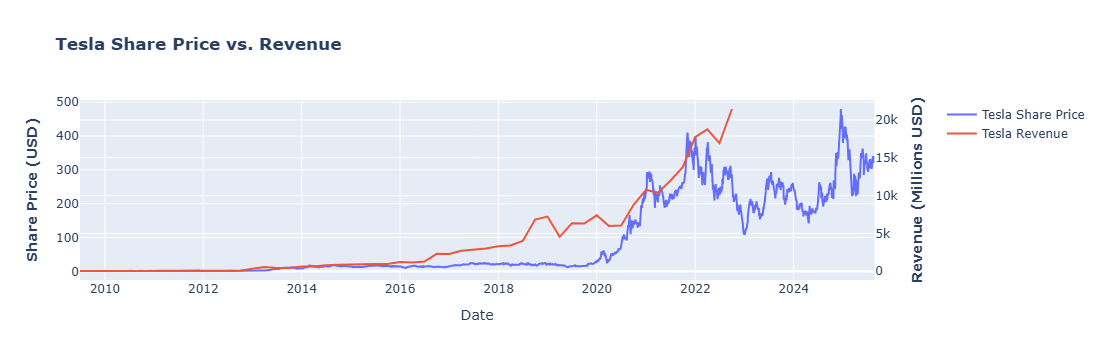

In [10]:
# Define the plotting function
def make_graph(stock_data, revenue_data, stock_name):
    fig = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])
    
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], name=f"{stock_name} Share Price"), secondary_y=False)
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'].astype(float), name=f"{stock_name} Revenue"), secondary_y=True)
    
    fig.update_layout(title_text=f"<b>{stock_name} Share Price vs. Revenue</b>")
    fig.update_xaxes(title_text="Date")
    fig.update_yaxes(title_text="<b>Share Price (USD)</b>", secondary_y=False)
    fig.update_yaxes(title_text="<b>Revenue (Millions USD)</b>", secondary_y=True)
    
    fig.show()

# --- Question 5: Plot Tesla Stock Graph ---
make_graph(tesla_data, tesla_revenue, 'Tesla')

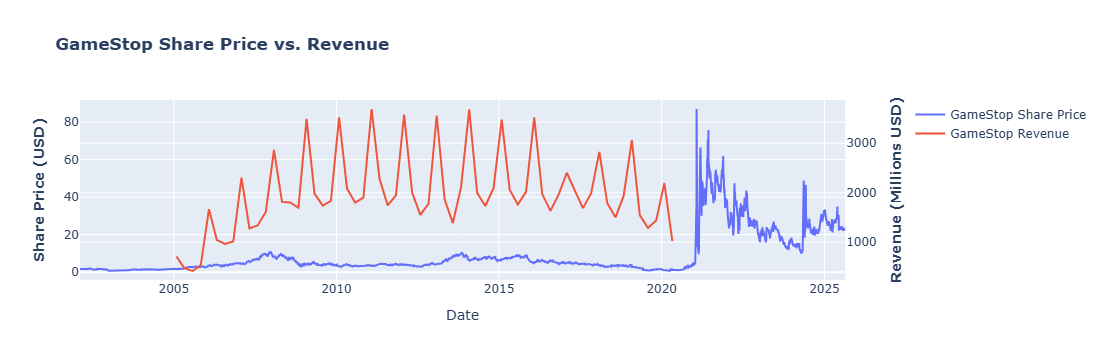

In [11]:
# Define the plotting function
def make_graph(stock_data, revenue_data, stock_name):
    fig = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])
    
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], name=f"{stock_name} Share Price"), secondary_y=False)
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'].astype(float), name=f"{stock_name} Revenue"), secondary_y=True)
    
    fig.update_layout(title_text=f"<b>{stock_name} Share Price vs. Revenue</b>")
    fig.update_xaxes(title_text="Date")
    fig.update_yaxes(title_text="<b>Share Price (USD)</b>", secondary_y=False)
    fig.update_yaxes(title_text="<b>Revenue (Millions USD)</b>", secondary_y=True)
    
    fig.show()

# --- Question 6: Plot GameStop Stock Graph ---
make_graph(gme_data, gme_revenue, 'GameStop')